<a href="https://colab.research.google.com/github/swati2000/TensorFlow/blob/master/NN%20with%20Fashion%20MNISTcdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Tensorflow
import tensorflow as tf

#This will go away n future
#It will generate error if you are using Tensorflow 2 or above
#If so then just comment out this line and run the cell again
tf.enable_eager_execution()

In [2]:
from __future__ import absolute_import, division, print_function

#import Tensorflow datasets
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

#Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

#Improve Progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

1.15.0


In [3]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [0]:
#Load the Fashion MNIST dataset
dataset,metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
#Define the classes
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
#Split the Training dataset and Testing Dataset
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of Training examples : {}'.format(num_train_examples))
print('Number of Testing examples : {}'.format(num_test_examples))

Number of Training examples : 60000
Number of Testing examples : 10000


In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /=255
  return (images, labels)

#the map function applies the normalize function to each element in the train and test dadaset
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

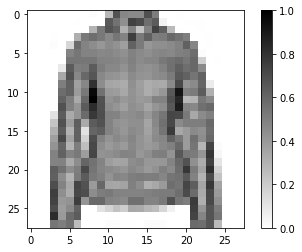

In [8]:
#take a single image, and remove color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

#plot the image-voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


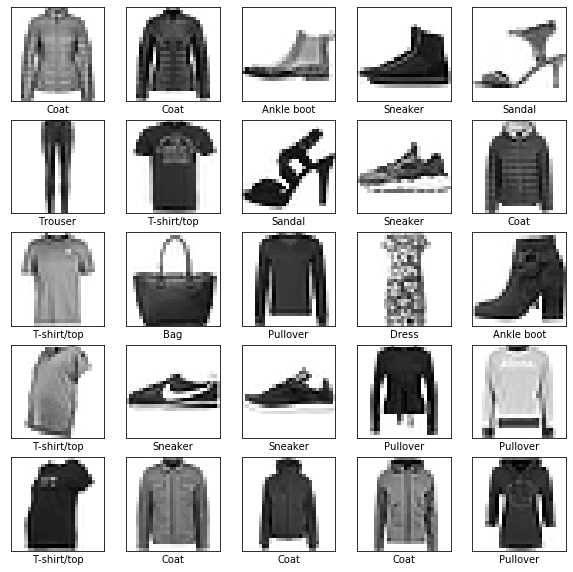

In [9]:
#Plotting the first 25 images
plt.figure(figsize=(10,10))
i=0
for (image,label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_name[label])
  i += 1
plt.show()

In [0]:
#Define the model by choosing no. of layers and neurons in each layer
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(64, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                             ])

In [0]:
#Compile the model by defining optimizer function(Adam) and loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
model.fit(train_dataset, epochs=20, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4850 - acc: 0.8250
Epoch 2/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3688 - acc: 0.8649
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3294 - acc: 0.8802
Epoch 4/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3048 - acc: 0.8874
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2931 - acc: 0.8900
Epoch 6/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2729 - acc: 0.8981
Epoch 7/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2628 - acc: 0.9030
Epoch 8/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2547 - acc: 0.9040
Epoch 9/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2469 - acc: 0.9081
Epoch 10/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2355 - 

In [14]:
#Evaluate accuracy
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_train_examples/32))
print('Accuracy on Test Dataset: ', test_accuracy)

 313/1875 [====>.........................] - ETA: 22s - loss: 0.3601 - acc: 0.8910Accuracy on Test Dataset:  0.891


In [0]:
#Prediction on Test Dataset
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [16]:
predictions.shape

(32, 10)

In [17]:
#Prediction for the first image
predictions[0]

array([3.7953945e-05, 1.2442358e-07, 1.0713666e-03, 1.2181629e-06,
       9.9439502e-01, 1.4669176e-12, 4.4943737e-03, 2.0476351e-13,
       1.1360347e-09, 3.5761233e-14], dtype=float32)

In [18]:
#argmax function on numpy to predict the largest index
np.argmax(predictions[0])

4

In [19]:
test_labels[0]

4